# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [324]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

648


In [4]:
print(cities)

['iqaluit', 'taolanaro', 'mataura', 'luderitz', 'hobart', 'pleasant grove', 'chokurdakh', 'lata', 'colchester', 'havre-saint-pierre', 'leningradskiy', 'geraldton', 'broome', 'puerto ayora', 'tsihombe', 'rikitea', 'cayenne', 'valparaiso', 'cape town', 'butaritari', 'neyshabur', 'krasnoselkup', 'kahului', 'avarua', 'albany', 'upernavik', 'orbetello', 'barra do garcas', 'ushuaia', 'busselton', 'kapaa', 'pedernales', 'ambodifototra', 'tsivilsk', 'jamestown', 'petropavlovsk-kamchatskiy', 'taltal', 'chengde', 'vaitupu', 'punta arenas', 'vostok', 'mys shmidta', 'tahoua', 'thompson', 'kazalinsk', 'tual', 'roald', 'richards bay', 'lebu', 'yeppoon', 'hilo', 'simbahan', 'qaanaaq', 'loreto', 'port alfred', 'dumraon', 'new norfolk', 'cherskiy', 'careiro da varzea', 'batemans bay', 'tuatapere', 'alexandria', 'umzimvubu', 'kodiak', 'tuktoyaktuk', 'gat', 'arraial do cabo', 'kingaroy', 'new glasgow', 'huarmey', 'carnarvon', 'dali', 'altona', 'lompoc', 'mahanoro', 'port keats', 'saldanha', 'saint-george

In [5]:
#variable to store weather latitudes
weather_lats= []
#variable for longitudes
weather_longs=[]
#variable to store weather temps
weather_data = []
#variable for wind speed
weather_wind=[]
#variable for weather string
weather_string=[]
#variable for city name
city_names=[]

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#setting units to imperial
units = "imperial"
#building url for api call
url = "http://api.openweathermap.org/data/2.5/weather?"
#building search params for api
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#storing api response 'response'
#response = requests.get(query_url +city, time.sleep(1)).json()
#making for loop to loop through all cities 
for city in cities:
    #making api call
    try:
        response = requests.get(query_url + city ,time.sleep(1)).json()
        #storing weather data
        weather_data.append(response['main'])
        city_names.append(response['name'])
        weather_lats.append(response['coord']['lat'])
        weather_longs.append(response['coord']['lon'])
        weather_wind.append(response['wind']['speed'])
        weather_string.append(response['weather'][0])
        print("City Found: ", city)
        
    except:
        #print city not found
        if city != response:
            print("City not found: ", city)





City Found:  iqaluit
City not found:  taolanaro
City Found:  mataura
City Found:  luderitz
City Found:  hobart
City Found:  pleasant grove
City Found:  chokurdakh
City Found:  lata
City Found:  colchester
City Found:  havre-saint-pierre
City Found:  leningradskiy
City Found:  geraldton
City Found:  broome
City Found:  puerto ayora
City not found:  tsihombe
City Found:  rikitea
City Found:  cayenne
City Found:  valparaiso
City Found:  cape town
City Found:  butaritari
City Found:  neyshabur
City Found:  krasnoselkup
City Found:  kahului
City Found:  avarua
City Found:  albany
City Found:  upernavik
City Found:  orbetello
City Found:  barra do garcas
City Found:  ushuaia
City Found:  busselton
City Found:  kapaa
City Found:  pedernales
City not found:  ambodifototra
City Found:  tsivilsk
City Found:  jamestown
City Found:  petropavlovsk-kamchatskiy
City Found:  taltal
City Found:  chengde
City not found:  vaitupu
City Found:  punta arenas
City Found:  vostok
City not found:  mys shmidta


City Found:  lodeynoye pole
City Found:  chifeng
City Found:  avera
City not found:  louisbourg
City Found:  plouzane
City Found:  anloga
City Found:  puerto narino
City Found:  winslow
City not found:  marcona
City Found:  north battleford
City Found:  wellington
City Found:  airai
City Found:  maniitsoq
City Found:  kushima
City Found:  mezhdurechensk
City Found:  idlib
City Found:  sosva
City Found:  natchez
City Found:  olafsvik
City Found:  muros
City Found:  tromso
City not found:  amderma
City Found:  rawson
City Found:  coquimbo
City not found:  saleaula
City Found:  morant bay
City Found:  iralaya
City Found:  porto walter
City Found:  talcahuano
City Found:  te anau
City Found:  tongchuan
City Found:  port lincoln
City Found:  turukhansk
City Found:  atuona
City Found:  rudsar
City Found:  ponta do sol
City Found:  norman wells
City Found:  kjopsvik
City Found:  margate
City Found:  sao raimundo das mangabeiras
City Found:  muravlenko
City Found:  santa cruz de tenerife
City 

In [146]:
#making dataframes out of our variables
summary= pd.DataFrame({'city name':city_names,'lat':weather_lats,'long':weather_longs,'wind speed': weather_wind})
summary

,city name,lat,long,wind speed
0,Iqaluit,63.7506,-68.5145,23.02
1,Mataura,-46.1927,168.8643,1.05
2,Lüderitz,-26.6481,15.1594,23.64
3,Hobart,-42.8794,147.3294,6.91
4,Pleasant Grove,40.3641,-111.7385,3.00
...,...,...,...,...
572,Havøysund,70.9963,24.6622,21.85
573,Bani Walid,31.7566,13.9942,7.49
574,Shar'ya,58.3686,45.5144,8.90
575,Jalu,29.0331,21.5482,3.29


In [142]:
weather=pd.DataFrame(weather_data)
weather

,temp,feels_like,temp_min,temp_max,pressure,humidity,sea_level,grnd_level
0,21.20,2.86,21.20,21.20,1014,79,NaN,NaN
1,56.91,56.16,56.91,56.91,1021,75,1021.0,1015.0
2,73.65,61.52,73.65,73.65,1012,50,1012.0,1008.0
3,63.46,63.50,62.01,64.99,994,94,NaN,NaN
4,30.99,24.93,27.00,36.00,1013,81,NaN,NaN
...,...,...,...,...,...,...,...,...
572,30.24,12.88,28.40,32.00,1029,64,NaN,NaN
573,64.92,56.73,64.92,64.92,1020,26,1020.0,994.0
574,7.68,-3.32,7.68,7.68,997,95,997.0,981.0
575,55.90,52.09,55.90,55.90,1024,58,1024.0,1020.0


In [154]:
summary=summary.reset_index()

In [155]:
weather=weather.reset_index()

In [156]:
complete_df= weather.merge(summary,how='inner', on='index')


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [164]:
clean_data=complete_df.drop(['index'],axis=1)

In [165]:
clean_data

,temp,feels_like,temp_min,temp_max,pressure,humidity,sea_level,grnd_level,city name,lat,long,wind speed
0,21.20,2.86,21.20,21.20,1014,79,NaN,NaN,Iqaluit,63.7506,-68.5145,23.02
1,56.91,56.16,56.91,56.91,1021,75,1021.0,1015.0,Mataura,-46.1927,168.8643,1.05
2,73.65,61.52,73.65,73.65,1012,50,1012.0,1008.0,Lüderitz,-26.6481,15.1594,23.64
3,63.46,63.50,62.01,64.99,994,94,NaN,NaN,Hobart,-42.8794,147.3294,6.91
4,30.99,24.93,27.00,36.00,1013,81,NaN,NaN,Pleasant Grove,40.3641,-111.7385,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...
572,30.24,12.88,28.40,32.00,1029,64,NaN,NaN,Havøysund,70.9963,24.6622,21.85
573,64.92,56.73,64.92,64.92,1020,26,1020.0,994.0,Bani Walid,31.7566,13.9942,7.49
574,7.68,-3.32,7.68,7.68,997,95,997.0,981.0,Shar'ya,58.3686,45.5144,8.90
575,55.90,52.09,55.90,55.90,1024,58,1024.0,1020.0,Jalu,29.0331,21.5482,3.29


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [159]:
complete_df[complete_df['humidity']>100]

,index,temp,feels_like,temp_min,temp_max,pressure,humidity,sea_level,grnd_level,city name,lat,long,wind speed


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [166]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Temperature vs. City Latitude 2/5/2021')

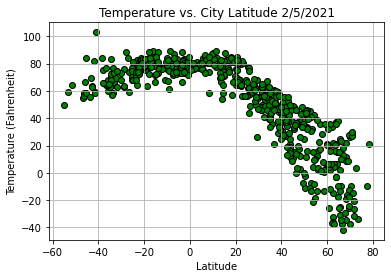

In [273]:
tick_loc= [value for value in xaxis]
plt.scatter(clean_data['lat'], clean_data['temp'],facecolors="g", cmap="RdYlGn",edgecolors="black")
plt.grid()
plt.gray()
plt.ylabel('Temperature (Fahrenheit)')
plt.xlabel('Latitude')
plt.title('Temperature vs. City Latitude 2/5/2021')

## Latitude vs. Humidity Plot

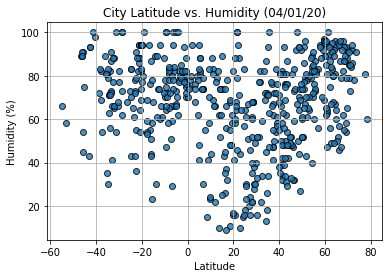

Text(0.5, 1.0, 'Humidity vs. City Latitude')

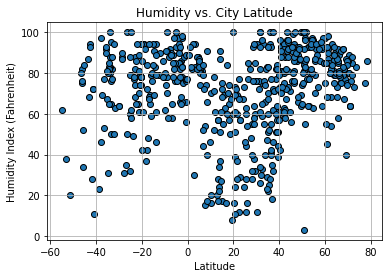

In [239]:
plt.scatter(clean_data['lat'],clean_data['humidity'],edgecolors='black')
plt.ylabel('Humidity Index (Fahrenheit)')
plt.xlabel('Latitude')
plt.grid()
plt.title('Humidity vs. City Latitude')

## Latitude vs. Cloudiness Plot

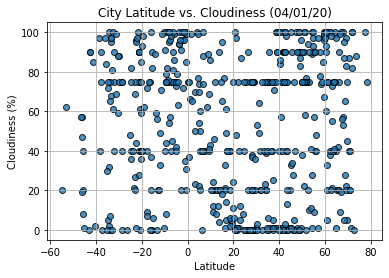

In [235]:
cloudiness=pd.DataFrame(weather_string)
copy=clean_data.copy()
cc=cloudiness.reset_index()

c=copy.reset_index()
clouds=c.merge(cc,on='index')
clouds

,index,temp,feels_like,temp_min,temp_max,pressure,humidity,sea_level,grnd_level,city name,lat,long,wind speed,id,main,description,icon
0,0,21.20,2.86,21.20,21.20,1014,79,NaN,NaN,Iqaluit,63.7506,-68.5145,23.02,601,Snow,snow,13d
1,1,56.91,56.16,56.91,56.91,1021,75,1021.0,1015.0,Mataura,-46.1927,168.8643,1.05,801,Clouds,few clouds,02d
2,2,73.65,61.52,73.65,73.65,1012,50,1012.0,1008.0,Lüderitz,-26.6481,15.1594,23.64,800,Clear,clear sky,01n
3,3,63.46,63.50,62.01,64.99,994,94,NaN,NaN,Hobart,-42.8794,147.3294,6.91,501,Rain,moderate rain,10d
4,4,30.99,24.93,27.00,36.00,1013,81,NaN,NaN,Pleasant Grove,40.3641,-111.7385,3.00,601,Snow,snow,13d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,572,30.24,12.88,28.40,32.00,1029,64,NaN,NaN,Havøysund,70.9963,24.6622,21.85,600,Snow,light snow,13n
573,573,64.92,56.73,64.92,64.92,1020,26,1020.0,994.0,Bani Walid,31.7566,13.9942,7.49,804,Clouds,overcast clouds,04n
574,574,7.68,-3.32,7.68,7.68,997,95,997.0,981.0,Shar'ya,58.3686,45.5144,8.90,804,Clouds,overcast clouds,04n
575,575,55.90,52.09,55.90,55.90,1024,58,1024.0,1020.0,Jalu,29.0331,21.5482,3.29,800,Clear,clear sky,01n


Text(0.5, 1.0, 'weather vs. latitude 2/5/21')

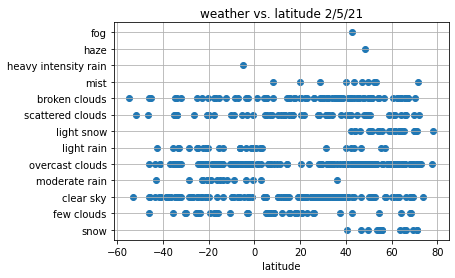

In [259]:
cloudscover=clouds['description'].value_counts()
#plt.scatter(clouds['lat'],clouds['description'])
#plt.xlabel('latitude')
#plt.grid()
#plt.title('weather vs. latitude 2/5/21')

## Latitude vs. Wind Speed Plot

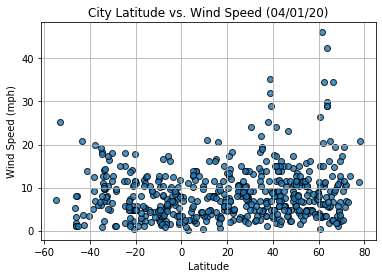

Text(0.5, 1.0, 'wind speed vs. latitude')

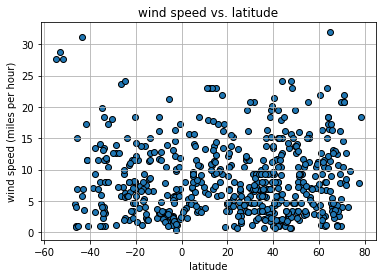

In [243]:
plt.scatter(clean_data['lat'],clean_data['wind speed'],edgecolors='black')
plt.xlabel('latitude')
plt.ylabel('wind speed (miles per hour)')
plt.grid()
plt.title('wind speed vs. latitude')

## Linear Regression

In [260]:
clouds

,index,temp,feels_like,temp_min,temp_max,pressure,humidity,sea_level,grnd_level,city name,lat,long,wind speed,id,main,description,icon
0,0,21.20,2.86,21.20,21.20,1014,79,NaN,NaN,Iqaluit,63.7506,-68.5145,23.02,601,Snow,snow,13d
1,1,56.91,56.16,56.91,56.91,1021,75,1021.0,1015.0,Mataura,-46.1927,168.8643,1.05,801,Clouds,few clouds,02d
2,2,73.65,61.52,73.65,73.65,1012,50,1012.0,1008.0,Lüderitz,-26.6481,15.1594,23.64,800,Clear,clear sky,01n
3,3,63.46,63.50,62.01,64.99,994,94,NaN,NaN,Hobart,-42.8794,147.3294,6.91,501,Rain,moderate rain,10d
4,4,30.99,24.93,27.00,36.00,1013,81,NaN,NaN,Pleasant Grove,40.3641,-111.7385,3.00,601,Snow,snow,13d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,572,30.24,12.88,28.40,32.00,1029,64,NaN,NaN,Havøysund,70.9963,24.6622,21.85,600,Snow,light snow,13n
573,573,64.92,56.73,64.92,64.92,1020,26,1020.0,994.0,Bani Walid,31.7566,13.9942,7.49,804,Clouds,overcast clouds,04n
574,574,7.68,-3.32,7.68,7.68,997,95,997.0,981.0,Shar'ya,58.3686,45.5144,8.90,804,Clouds,overcast clouds,04n
575,575,55.90,52.09,55.90,55.90,1024,58,1024.0,1020.0,Jalu,29.0331,21.5482,3.29,800,Clear,clear sky,01n


In [283]:
#setting max hemisphere temp
max_temp= clouds[clouds['lat']>0]
max_temp

,index,temp,feels_like,temp_min,temp_max,pressure,humidity,sea_level,grnd_level,city name,lat,long,wind speed,id,main,description,icon
0,0,21.20,2.86,21.20,21.20,1014,79,NaN,NaN,Iqaluit,63.7506,-68.5145,23.02,601,Snow,snow,13d
4,4,30.99,24.93,27.00,36.00,1013,81,NaN,NaN,Pleasant Grove,40.3641,-111.7385,3.00,601,Snow,snow,13d
5,5,-9.80,-24.68,-9.80,-9.80,1020,89,1020.0,1016.0,Chokurdakh,70.6333,147.9167,14.54,804,Clouds,overcast clouds,04n
6,6,50.77,50.20,48.99,52.00,1000,96,NaN,NaN,Lata,40.1629,-8.3327,1.01,500,Rain,light rain,10n
7,7,42.66,36.84,42.01,44.01,1006,100,NaN,NaN,Colchester,51.8892,0.9042,7.34,800,Clear,clear sky,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,571,73.42,75.54,73.42,73.42,1009,84,1009.0,996.0,Wattegama,6.7989,81.4808,8.28,804,Clouds,overcast clouds,04n
572,572,30.24,12.88,28.40,32.00,1029,64,NaN,NaN,Havøysund,70.9963,24.6622,21.85,600,Snow,light snow,13n
573,573,64.92,56.73,64.92,64.92,1020,26,1020.0,994.0,Bani Walid,31.7566,13.9942,7.49,804,Clouds,overcast clouds,04n
574,574,7.68,-3.32,7.68,7.68,997,95,997.0,981.0,Shar'ya,58.3686,45.5144,8.90,804,Clouds,overcast clouds,04n


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

LinregressResult(slope=-1.4246741352339294, intercept=96.5224961055091, rvalue=-0.8683416316472342, pvalue=5.725601717056143e-123, stderr=0.04083965296533218)

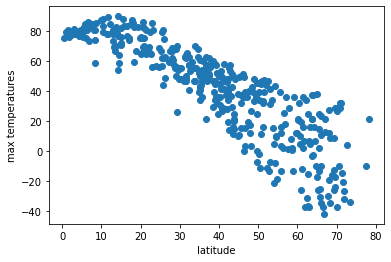

In [318]:
#plotting north hemisphere max temps
maxtemp=max_temp['temp_max']
plt.scatter(max_temp['lat'],maxtemp)
plt.xlabel('latitude')
plt.ylabel('max temperatures')
#linear regression
linregress(max_temp['lat'],maxtemp)

In [276]:
#we can see the relationship of temperatures decrease as the latitudes increase from the graph above

The r-value is: 0.46937863826630627


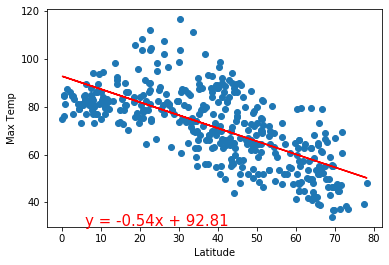

LinregressResult(slope=0.31965239696373, intercept=81.46883110721372, rvalue=0.517478999193543, pvalue=1.4010788293576232e-13, stderr=0.03984266287119259)

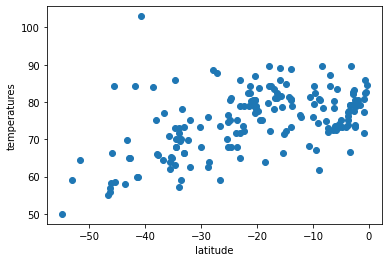

In [319]:
#setting variables to graph south hem max temps
south=clouds[clouds['lat']<0]
#graphing south hem max temps
plt.scatter(south['lat'],south['temp_max'])
plt.xlabel('latitude')
plt.ylabel('temperatures')
#performing liner regression
linregress(south['lat'],south['temp_max'])

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [320]:
#in this graph above, we can see a trend of increasing temperatures as the latitude of cities decrease

The r-value is: 0.6082708688906918


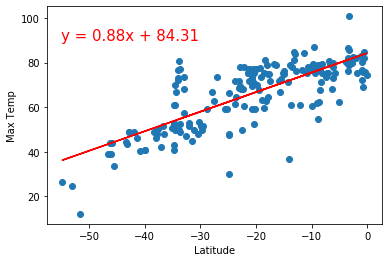

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [293]:
clouds

,index,temp,feels_like,temp_min,temp_max,pressure,humidity,sea_level,grnd_level,city name,lat,long,wind speed,id,main,description,icon
0,0,21.20,2.86,21.20,21.20,1014,79,NaN,NaN,Iqaluit,63.7506,-68.5145,23.02,601,Snow,snow,13d
1,1,56.91,56.16,56.91,56.91,1021,75,1021.0,1015.0,Mataura,-46.1927,168.8643,1.05,801,Clouds,few clouds,02d
2,2,73.65,61.52,73.65,73.65,1012,50,1012.0,1008.0,Lüderitz,-26.6481,15.1594,23.64,800,Clear,clear sky,01n
3,3,63.46,63.50,62.01,64.99,994,94,NaN,NaN,Hobart,-42.8794,147.3294,6.91,501,Rain,moderate rain,10d
4,4,30.99,24.93,27.00,36.00,1013,81,NaN,NaN,Pleasant Grove,40.3641,-111.7385,3.00,601,Snow,snow,13d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,572,30.24,12.88,28.40,32.00,1029,64,NaN,NaN,Havøysund,70.9963,24.6622,21.85,600,Snow,light snow,13n
573,573,64.92,56.73,64.92,64.92,1020,26,1020.0,994.0,Bani Walid,31.7566,13.9942,7.49,804,Clouds,overcast clouds,04n
574,574,7.68,-3.32,7.68,7.68,997,95,997.0,981.0,Shar'ya,58.3686,45.5144,8.90,804,Clouds,overcast clouds,04n
575,575,55.90,52.09,55.90,55.90,1024,58,1024.0,1020.0,Jalu,29.0331,21.5482,3.29,800,Clear,clear sky,01n


LinregressResult(slope=0.4223565542410522, intercept=54.07028059492134, rvalue=0.3693745888885937, pvalue=2.4125334022394437e-14, stderr=0.05332904854851044)

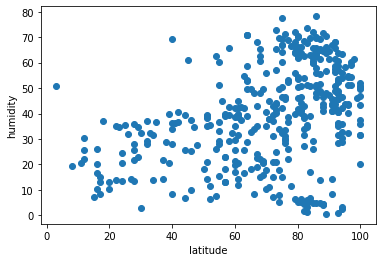

In [325]:
#plotting southern hemisphere humidity 
north_humidity=clouds[clouds['lat']>0]
plt.scatter(north_humidity['humidity'],north_humidity['lat'])
plt.xlabel('latitude')
plt.ylabel('humidity')
#linear regression values
linregress(north_humidity['lat'],north_humidity['humidity'])

The r-value is: 0.000543987878808455


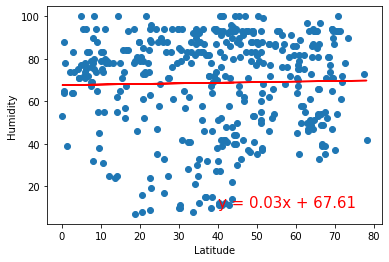

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

LinregressResult(slope=0.38184505278518704, intercept=82.94975365710458, rvalue=0.29702854452849464, pvalue=5.6689816803058904e-05, stderr=0.0925286571680609)

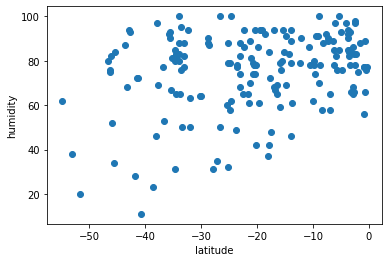

In [326]:
#plotting southern hemisphere humidity 
south_humidity=clouds[clouds['lat']<0]
plt.scatter(south_humidity['lat'],south_humidity['humidity'])
plt.xlabel('latitude')
plt.ylabel('humidity')
#linear regression values
linregress(south_humidity['lat'],south_humidity['humidity'])

The r-value is: 0.014985174297345524


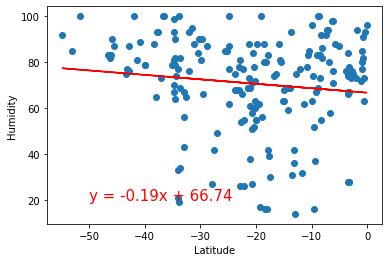

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


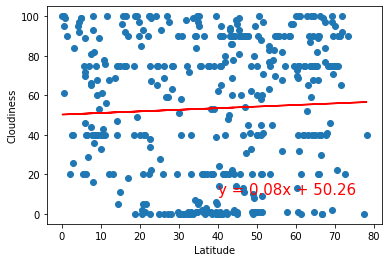

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


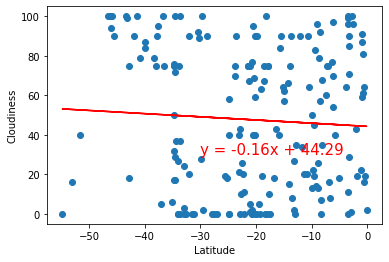

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

LinregressResult(slope=0.006943644338150932, intercept=8.326064292082618, rvalue=0.023420946898661314, pvalue=0.6409082605081979, stderr=0.014875398811383717)

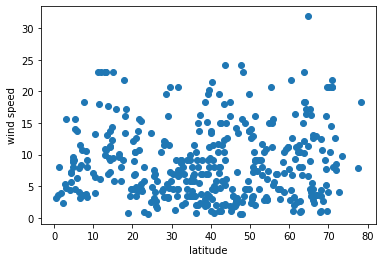

In [314]:
#plotting southern hemisphere humidity 
north_wind=clouds[clouds['lat']>0]
plt.scatter(north_wind['lat'],north_wind['wind speed'])
plt.xlabel('latitude')
plt.ylabel('wind speed')
#linear regression values
linregress(north_wind['lat'],north_wind['wind speed'])

The r-value is: 0.04019723576144484


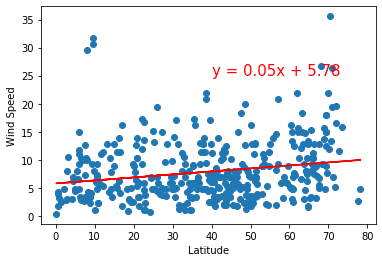

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

LinregressResult(slope=-0.10960714259472149, intercept=5.784777786714162, rvalue=-0.2504717467192979, pvalue=0.0007460234560102714, stderr=0.03193410313859213)

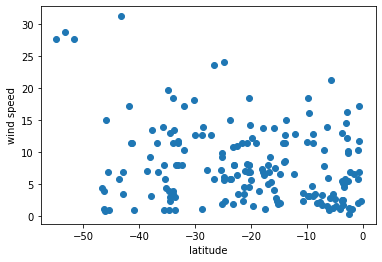

In [316]:
#plotting southern hemisphere humidity 
south_wind=clouds[clouds['lat']<0]
plt.scatter(south_wind['lat'],south_wind['wind speed'])
plt.xlabel('latitude')
plt.ylabel('wind speed')
#linear regression values
linregress(south_wind['lat'],south_wind['wind speed'])

The r-value is: 0.017128274759839232


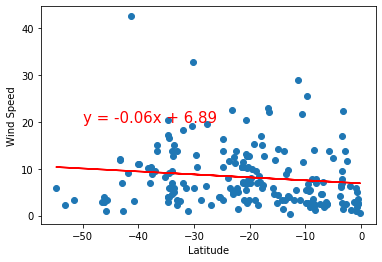

In [327]:
import os
import csv

In [330]:
clouds.to_csv('weather_data.csv', header=True,index=True)